# Analysis: Graam Liu Project 3 Extra Credit

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

## Import Financial Data

In [2]:
df_stocks = pd.read_csv("results.csv")

In [4]:
df_stocks.head()

,name,max_price,time_of_day,by_hour
0,PINS,41.71,2021-11-30 09:45:00.000 -05:00,9
1,SNAP,49.40,2021-11-30 09:35:00.000 -05:00,9
2,BYND,74.54,2021-11-30 09:35:00.000 -05:00,9
3,TTD,110.87,2021-11-30 09:30:00.000 -05:00,9
4,DDOG,186.21,2021-11-30 09:35:00.000 -05:00,9


## Graph 1: Time Series of Hourly Maximum Price by Stock

In [16]:
#create mame set from name column
name_set = set(df_stocks['name'])
name_set

{'BYND', 'DDOG', 'FB', 'NFLX', 'OKTA', 'PINS', 'SHOP', 'SNAP', 'SQ', 'TTD'}

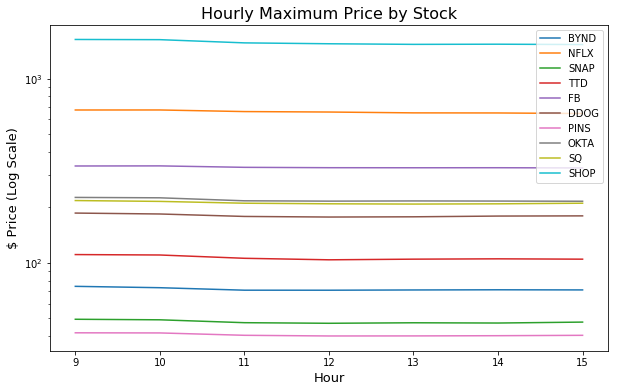

In [80]:
#plot line chart
plt.figure(figsize = (10, 6))
plt.title('Hourly Maximum Price by Stock', fontsize = 16)
plt.ylabel('$ Price (Log Scale)', fontsize = 13)
plt.xlabel('Hour', fontsize = 13)
plt.yscale('log') #accounts for the wide range in prices

for name in name_set:
    subset_df_stocks = df_stocks.loc[df_stocks['name'] == name]
    plt.plot(subset_df_stocks['by_hour'], subset_df_stocks['max_price'],label = name)
    
plt.legend()
plt.show()

Analysis: This shows the various price "resistances" that each stock encounters, or the price points where selling overpowers buying. All of the stocks have a somewhat steady resistance throughout the day, with a possible small dip in the overall market after 10 am.

## Graph 2: Boxplot of Hourly Maximum Price by Stock

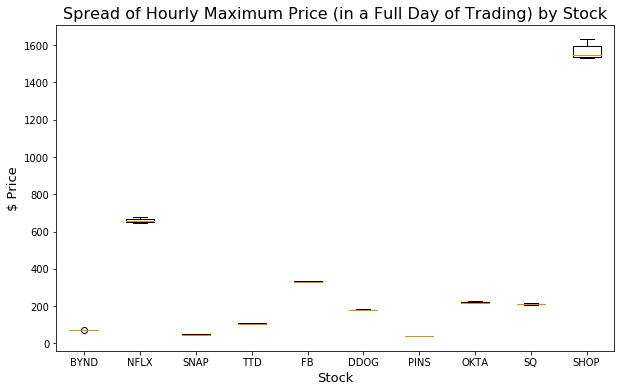

In [77]:
#plot line chart
plt.figure(figsize = (10, 6))
plt.title('Spread of Hourly Maximum Price (in a Full Day of Trading) by Stock', fontsize = 16)
plt.ylabel('$ Price', fontsize = 13)
plt.xlabel('Stock', fontsize = 13)

boxplot_data = []
boxplot_labels = []

for name in name_set:
    subset_df_stocks = df_stocks.loc[df_stocks['name'] == name]
    boxplot_data.append(subset_df_stocks['max_price'])
    boxplot_labels.append(name)
    
plt.boxplot(boxplot_data, labels = boxplot_labels)

plt.show()

Analysis: SHOP has the greatest spread in its hourly maximum price with NFLX being the second highest. This implies volatitlity in trading for those two stocks and possibly the technology sector for November 30, 2021. 

## Graph 3: Barchart of Maximum Price for November 30, 2021 by Stock

In [68]:
#create subset
df_barchart = df_stocks.groupby(by='name')[['max_price']].max()
df_barchart.reset_index(inplace = True)

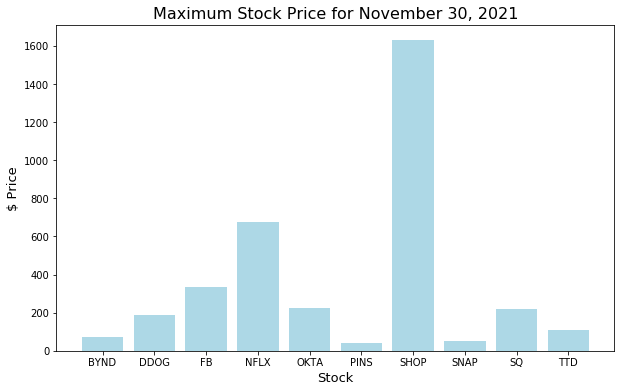

In [78]:
#plot line chart
plt.figure(figsize = (10, 6))
plt.title('Maximum Stock Price for November 30, 2021', fontsize = 16)
plt.ylabel('$ Price', fontsize = 13)
plt.xlabel('Stock', fontsize = 13)

plt.bar(height = df_barchart['max_price'],
        x = df_barchart['name'],
        color = "lightblue")

plt.show()

Analysis: This shows that the most expensive stock is SHOP and the least expensive is PINS (on a per share basis) even when bought at their maximum stock price. 